<a href="https://colab.research.google.com/github/jgchen716/spotify-ml/blob/main/Spotify_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Proposal!](https://drive.google.com/file/d/19b-_nB7bUy4G57eL8gKD0lMAyOs1A7MN/view?usp=sharing)

## Initial Setup

In [1]:
!apt install libkrb5-dev
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user
!pip install afinn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 31 not upgraded.
Need to get 349 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.2 [54.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.2 [37.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5srv-mit11 amd64 1.16-2ubuntu0.2 [49.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5

In [2]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:13 https://developer.download.nvidia.com/compute/

In [3]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [4]:
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='/content/gdrive'
drive.mount(DRIVE_MOUNT)

# create folder to write data to
CIS545_FOLDER=os.path.join(DRIVE_MOUNT, 'My Drive', 'CIS545_2021')
HOMEWORK_FOLDER=os.path.join(CIS545_FOLDER, 'SPOTIFY_PROJECT')
os.makedirs(HOMEWORK_FOLDER, exist_ok=True)

Mounted at /content/gdrive


In [5]:
# get json paths for each individual json file
json_path1 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.0-999.json")
json_path2 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.2000-2999.json")
json_path3 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.3000-3999.json")
json_path4 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.6000-6999.json")
json_path5 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.7000-7999.json")
json_path6 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.8000-8999.json")
json_path7 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.9000-9999.json")
json_path8 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.10000-10999.json")
json_path9 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.13000-13999.json")
json_path10 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.15000-15999.json")
json_path11 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.16000-16999.json")
json_path12 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.19000-19999.json")
json_path13 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.22000-22999.json")
json_path14 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.27000-27999.json")
json_path15 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.28000-28999.json")
json_path16 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.31000-31999.json")
json_path17 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.32000-32999.json")
json_path18 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.34000-34999.json")
json_path19 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.37000-37999.json")
json_path20 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.38000-38999.json")
json_path21 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.41000-41999.json")
json_path22 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.42000-42999.json")
json_path23 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.44000-44999.json")
json_path24 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.47000-47999.json")
json_path25 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.51000-51999.json")

## Data Cleaning and Data Wrangling

In [6]:
paths = [json_path1, json_path2, json_path3, json_path4, json_path5, 
         json_path6, json_path7, json_path8, json_path9, json_path10, 
         json_path11, json_path12, json_path13, json_path14, json_path15, 
         json_path16, json_path17, json_path18, json_path19, json_path20, 
         json_path21, json_path21, json_path23, json_path24, json_path25]

# create list of dataframes from each json path   
df_list = []
for json_path in paths:
  data = json.load(open(json_path))
  df = pd.DataFrame(data['playlists'])
  df_list.append(df)

# create master playlist df by unioning each df in df_list
playlist_df = pd.concat(df_list)

In [7]:
playlist_df

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,reg,false,51995,1504656000,96,75,1,"[{'pos': 0, 'artist_name': 'Ozuna', 'track_uri...",18,21177811,42,NaN
996,hindi,false,51996,1441324800,76,46,1,"[{'pos': 0, 'artist_name': 'Mohammed Rafi', 't...",2,25435178,20,NaN
997,New,false,51997,1508025600,66,52,1,"[{'pos': 0, 'artist_name': 'DJ Drama', 'track_...",47,14452236,41,NaN
998,Lit 🔥,false,51998,1509321600,64,52,1,"[{'pos': 0, 'artist_name': 'Drake', 'track_uri...",12,14188750,44,NaN


In [8]:
# Create tracks df to map playlist id (pid) to data for each track
df_rows = []
for path in paths:
  data = json.load(open(path))
  
  for d in range(len(data['playlists'])):
    entry = data['playlists'][d]
    track_list = entry['tracks']

    for item in track_list:
      item['pid'] = entry['pid']
      df_rows.append(item)

tracks_df = pd.DataFrame(df_rows)
tracks_df

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0
1,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,0
2,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),0
3,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,0
4,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,0
...,...,...,...,...,...,...,...,...,...
1667960,211,Tom Petty,spotify:track:7gSQv1OHpkIoAdUiRLdmI6,spotify:artist:2UZMlIwnkgAEDBsw1Rejkn,I Won't Back Down,spotify:album:5d71Imt5CIb7LpQwDMQ093,178360,Full Moon Fever,51999
1667961,212,Tom Petty,spotify:track:5tVA6TkbaAH9QMITTQRrNv,spotify:artist:2UZMlIwnkgAEDBsw1Rejkn,Free Fallin',spotify:album:5d71Imt5CIb7LpQwDMQ093,256000,Full Moon Fever,51999
1667962,213,Aerosmith,spotify:track:6gQUbFwwdYXlKdmqRoWKJe,spotify:artist:7Ey4PD4MYsKc5I2dolUwbH,Dude (Looks Like A Lady),spotify:album:3XYqOJI1YlX40kJTdzFEzp,265773,Permanent Vacation,51999
1667963,214,Pearl Jam,spotify:track:6QewNVIDKdSl8Y3ycuHIei,spotify:artist:1w5Kfo2jwwIPruYS2UWh56,Even Flow,spotify:album:5B4PYA7wNN4WdEXdIJu58a,292580,Ten,51999


## Visualizing the Data Set & Setting Our Goals: What Does Our Data Look Like?

### A sample data point
Our playlist data has lots of information on each Spotify playlist itself, as well as information on the individual tracks themselves. All this information is held in several smaller json files containing 1000 rows each. Check out an example below! 

In [9]:
%%html
<img src="https://drive.google.com/uc?export=view&id=1qfhU-mihDWEEuWvxMnXY1xabXwr_0tXS"></img>

One cool thing about our dataset that's worth noting is that it also came with some summary statistics in a `txt` file. For example, they had the number of tracks, number of unique tracks, top playlist titles, and a lot more (screenshot is shown below)! *Note that these summary statistics were taken over all 1 million rows in this dataset, whereas our project used a smaller sample of 25000 rows.*

In [10]:
%%html
<img src="https://drive.google.com/uc?export=view&id=16-taa2urXoS8vSJN_KWApy9OGP2e-GV1"></img>

### So... what are we working with?
Let's visualize some of the basic information about the data and get a sense of this sampling of playlists. We will answer several of the basic questions: 
*   What is the average playlist length in minutes?
*   How many songs per artist are
typically in the same playlist?
*   On average, how many different albums are present in one playlist?
*   On average, how many different artists are present in one playlist?
*   What percentage of playlists are collaborative, i.e. shared with other users?
*   What is the average number of songs on a playlist?
*   What is the average duration of a given song on a playlist?
*   Are playlist titles usually positive, negative, or neutral? (Sentiment Analysis)



#### Looking at Number of Artists, Number of Albums, Number of Tracks, and Playlist Duration

In [18]:
playlist_df['duration_min'] = playlist_df['duration_ms'].apply(lambda x: x/60000)

Text(0.5, 1.0, 'Playlist Duration (min)')

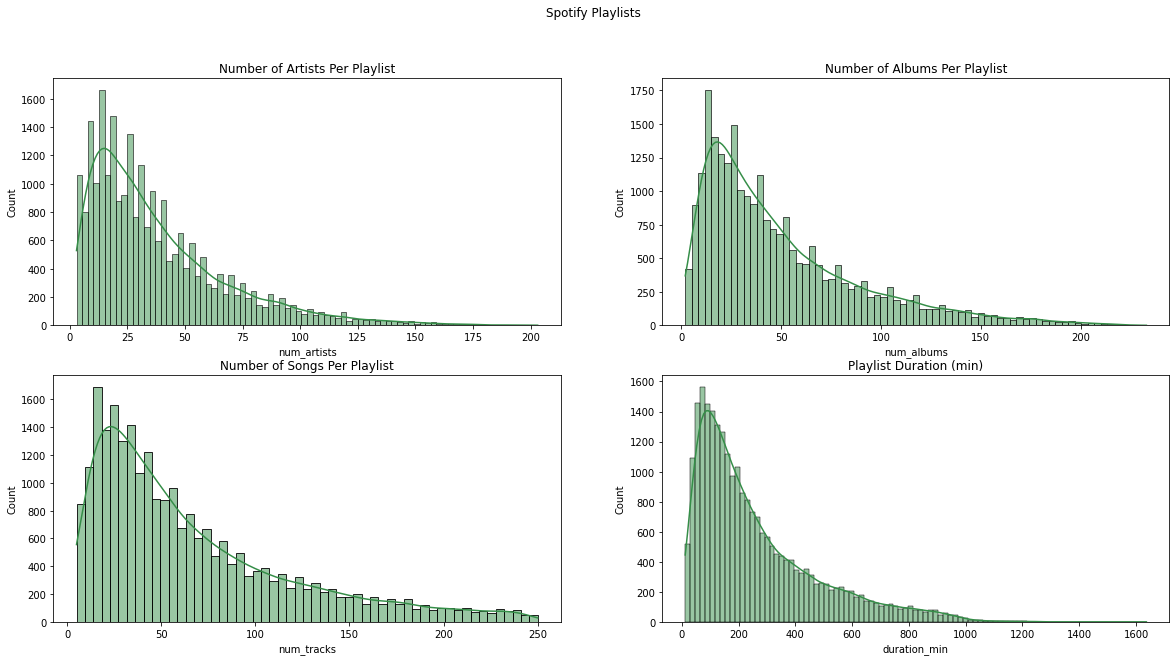

In [21]:
sns.set_palette("PRGn_r")
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Spotify Playlists')

# number of artists
sns.histplot()
sns.histplot(data=playlist_df, x="num_artists", kde=True, ax=axes[0][0])
axes[0][0].set_title("Number of Artists Per Playlist")

# number of albums
sns.histplot(data=playlist_df, x="num_albums", kde=True, ax=axes[0][1])
axes[0][1].set_title("Number of Albums Per Playlist")

# number of songs
sns.histplot(data=playlist_df, x="num_tracks", kde=True, ax=axes[1][0])
axes[1][0].set_title("Number of Songs Per Playlist")

# duration in minutes
sns.histplot(data=playlist_df, x="duration_min", kde=True, ax=axes[1][1])
axes[1][1].set_title("Playlist Duration (min)")

### What is the average playlist length in minutes?

In [29]:
from math import floor

# average playlist length in minutes
average_playlist_length_min = playlist_df['duration_min'].mean()
print("Average Playlist Length in Minutes:", average_playlist_length_min)

hours = floor(average_playlist_length_min / 60)
extra_mins = round(average_playlist_length_min - hours * 60)
print("In other words, the average playlist is {hrs} hours and {mins} minutes long.".format(hrs=hours, mins=extra_mins))

Average Playlist Length in Minutes: 260.9240714773331
In other words, the average playlist is 4 hours and 21 minutes long.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Playlist Duration (min)')]

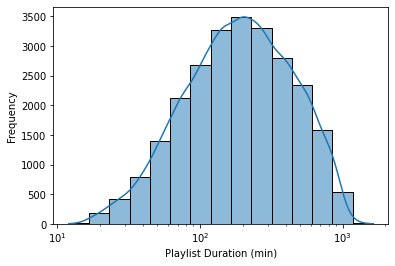

In [ ]:
playlist_duration_df = playlist_df[['duration_ms']]
playlist_duration_df['duration_min'] = playlist_duration_df['duration_ms'].apply(lambda x: x/60000)
ax1 = sns.histplot(data=playlist_duration_df, x="duration_min", kde=True, log_scale=True, bins = 15)
ax1.set(xlabel="Playlist Duration (min)", ylabel="Frequency")



In [ ]:
# What is the average number of songs per playlist?
song_count = tracks_df.groupby(['pid'])['artist_name'].count()
avg_num_songs = sum(song_count)/len(song_count)

print("Average Number of Songs Per Playlist:", avg_num_songs)

Average Number of Songs Per Playlist: 69.49854166666667


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Number of Songs')]

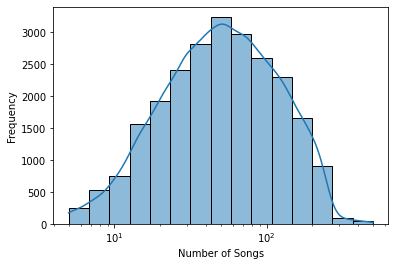

In [ ]:
song_count_df = song_count.to_frame(name='count')
ax2 = sns.histplot(data=song_count_df, x='count', kde=True, log_scale=True, bins = 15)
ax2.set(xlabel="Number of Songs", ylabel="Frequency")

In [ ]:
from collections import Counter

mini_tracks_df = tracks_df[['pid', 'artist_name']]

# prev_pid = -1
avg_songs_per_artist = []

# for index, row in mini_tracks_df.iterrows():
#   curr_pid = row['pid']

list_of_dfs = []
for _, g in tracks_df.groupby(mini_tracks_df['pid']):
    list_of_dfs.append(g)

for df in list_of_dfs:
  c = Counter(df['artist_name'].tolist())
  avg_songs_per_artist.append(sum(c.values()) / len(c.keys()))
  
print(sum(avg_songs_per_artist)/len(avg_songs_per_artist))

test_df = pd.DataFrame(avg_songs_per_artist)


2.245477911557373


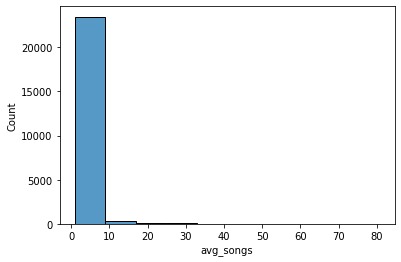

In [ ]:
test_df.columns=['avg_songs']
sns.histplot(x='avg_songs',data=test_df, bins=10)

In [ ]:
max(avg_songs_per_artist)

80.66666666666667

In [ ]:
# On average, how many different albums are present in one playlist?
num_albums = tracks_df.groupby('pid').count()[['album_name']]

In [ ]:
# On average, how many different artists are present in one playlist?
num_artists = tracks_df.groupby('pid').count()[['artist_name']]

In [ ]:
# What is the average number of followers on a given playlist?

In [ ]:
# What percentage of playlists are collaborative, i.e. shared with other users?
collaborative_count = playlist_df.groupby(['collaborative']).count()['name'].tolist()
percent_collab = collaborative_count[1] / sum(collaborative_count)
print("Percentage of Playlists That are Collaborative:", percent_collab)

Percentage of Playlists That are Collaborative: 0.02212


In [ ]:
from math import floor

# What is the average duration of a given song on a playlist?
average_duration_song = sum(tracks_df['duration_ms'])/len(tracks_df['duration_ms'])
average_duration_song = average_duration_song / 60000
minutes = floor(average_duration_song)
seconds = round((average_duration_song - minutes) * 60)
print("Average Playlist Length is {mins} minutes and {secs} seconds".format(mins=minutes, secs=seconds))

Average Playlist Length is 3 minutes and 55 seconds


In [ ]:
# Sentiment Analysis using AFINN score:
from afinn import Afinn
af = Afinn()

def get_playlist_sentiment(name):
  words = name.split()
  total_score = 0
  # calculate AFINN score for playlist name
  for word in words:
    total_score += af.score(word)
  
  if total_score > 0:
    return "positive"
  elif total_score < 0:
    return "negative"
  else:
    return "neutral"

playlist_df['sentiment'] = playlist_df['name'].apply(get_playlist_sentiment)

In [ ]:
from collections import Counter
sentiment_list = playlist_df['sentiment'].tolist()
sentiment_counts = Counter(sentiment_list)
sentiment_counts

Counter({'negative': 657, 'neutral': 22251, 'positive': 2092})

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sentiment')]

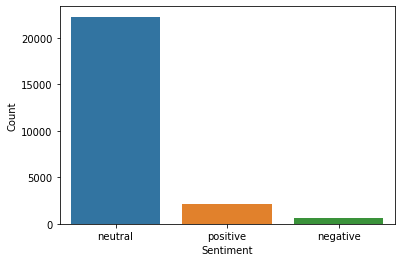

In [ ]:
sentiment_df = pd.DataFrame.from_dict(sentiment_counts, orient='index').reset_index()
sentiment_df.columns = ["sentiment", "count"]
ax2 = sns.barplot(x="sentiment", y="count", data=sentiment_df)
ax2.set(xlabel="Sentiment", ylabel="Count")

## How similar are playlists?
Now, with an understanding of the playlist structure. We want to set the foundation for our recommendation system. This recommendation system is based on the following hypothesis... 

Simply put, **our music taste is not that unique**. 

We hypothesize that every playlist will at least have one other like it. We define the following scoring system. For every tuple of playlists, we will give a score. Let us call the first playlist P1, and the second playlist P2. 


In [ ]:
# do not run cell
# algorithm is fake :o

artist_score = 0
for every artist A in P1, P2:
  p1_count = number of songs by A in P1
  p2_count = number of songs by A in P2
  artist_score += min(p1_count, p2_count)

final_score =  artist_score/(min(len(p1), len(p2)))

In [ ]:
# same avg songs per playlist

With this scoring system in mind, we will define the following:

Ranked from 1 to 3, 1 being the most similar. 
1.   Very Similar: ≥ 0.3
2.   Pretty Similar: ≥ 0.2
3.   Similar: ≥ 0.1
4.   Not Similar < 0.1

Therefore, our hypothesis is:
**Every playlist will have at least one playlist that it is VERY similar too.**

In [ ]:
def train_set():

In [ ]:
# train set

In [ ]:
def test_set():

In [ ]:
# test set 

## Spotify Recommendations

yuhhh machine learning section what is this

## Okay... maybe Spotify won't adopt our algorithm.

As expected, Spotify's recommendation system is much more complex and effective than ours. If we had additional data and advanced technology, we may have been able to address our following challenges. Let us analyze issues we ran into and how Spotify addresses them. 

Our main challenges included:
1.   Efficiency

Spotify has... 

2.   Recommendation + Information Acceess

Spotify's recommendation algorithm is based on several more parameters than ours. As opposed to just artist similarity (etc)

We also do not have access to ...

3.   Math

The crux of Spotify's [recommendation algorithm](https://towardsdatascience.com/how-spotify-recommends-your-new-favorite-artist-8c1850512af0#:~:text=Well%2C%20Spotify's%20recommender%20system%20provides,it%20deems%20%E2%80%9Csimilar%E2%80%9D%20users.) is trifold. 

"There are three recommendation models at work on Spotify:

1. Collaborative filtering: Uses your behavior and that of similar users.

2. Natural Language Processing (NLP): For song lyrics, playlists, blog posts, social media comments.

3. Audio models: Used on raw audio."

With its recommendations, Spotify has three main methods for motivating music exploration i.e. curating Discover Weekly, Radio, and recommended songs under each playlist.

1. Fully Randomized Experiment

2. Random Data Collection

3. Bandit Policy
 






## Party Playlist

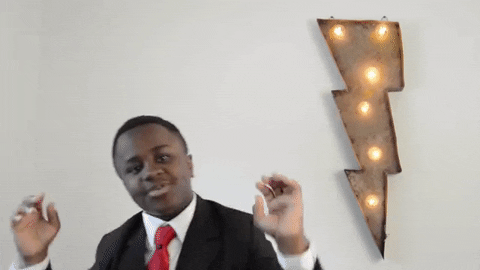